# Medical Insurance Prediction - Machine Learning Modeling

##### Dataset: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

## 1. Data Preprocessing

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

### Data Exploration

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='number')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


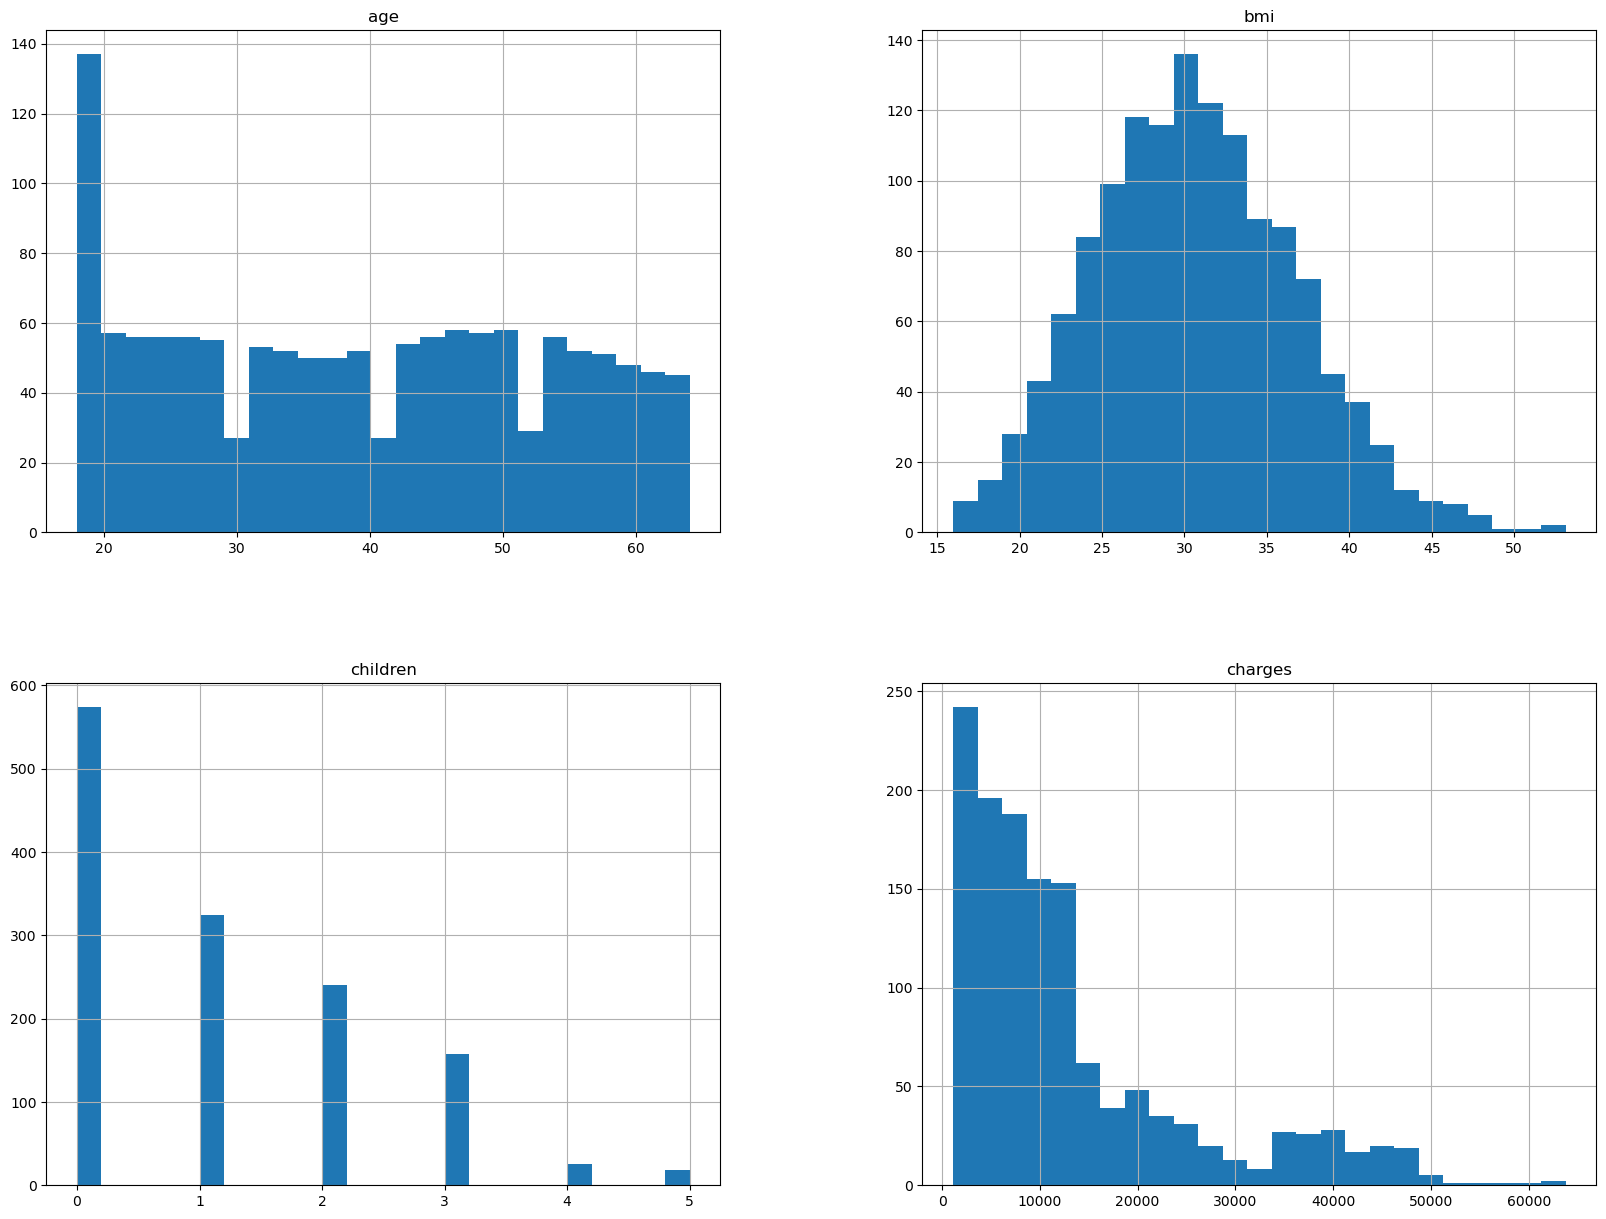

In [7]:
df.hist(bins=25, figsize=(20,15))
plt.show()

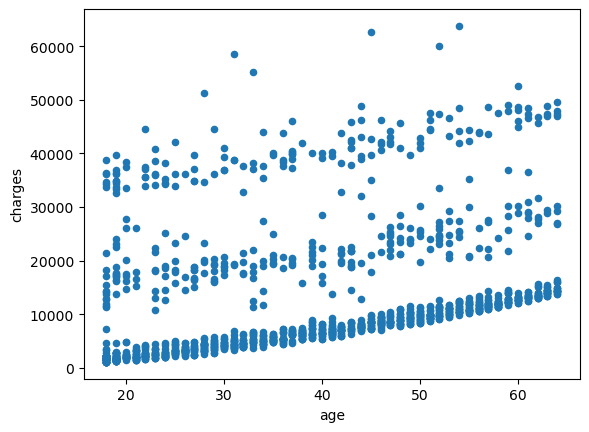

In [8]:
df.plot(x='age', y='charges', kind='scatter')
plt.show()

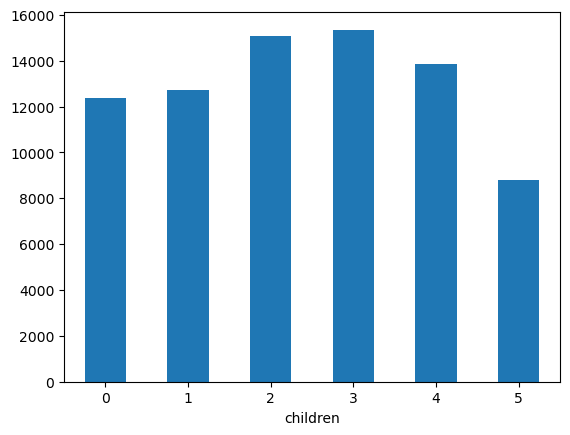

In [9]:
df.groupby('children')['charges'].mean().plot(kind='bar', rot=0)
plt.show()

In [10]:
df.plot

In [11]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [13]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


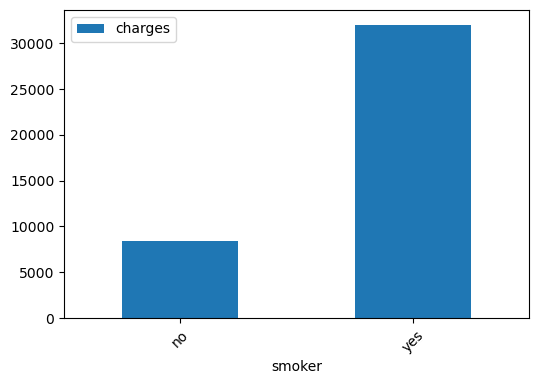

In [14]:
df[['smoker', 'charges']].groupby('smoker').mean().plot(kind='bar', figsize=(6,4), rot=45)
plt.show()

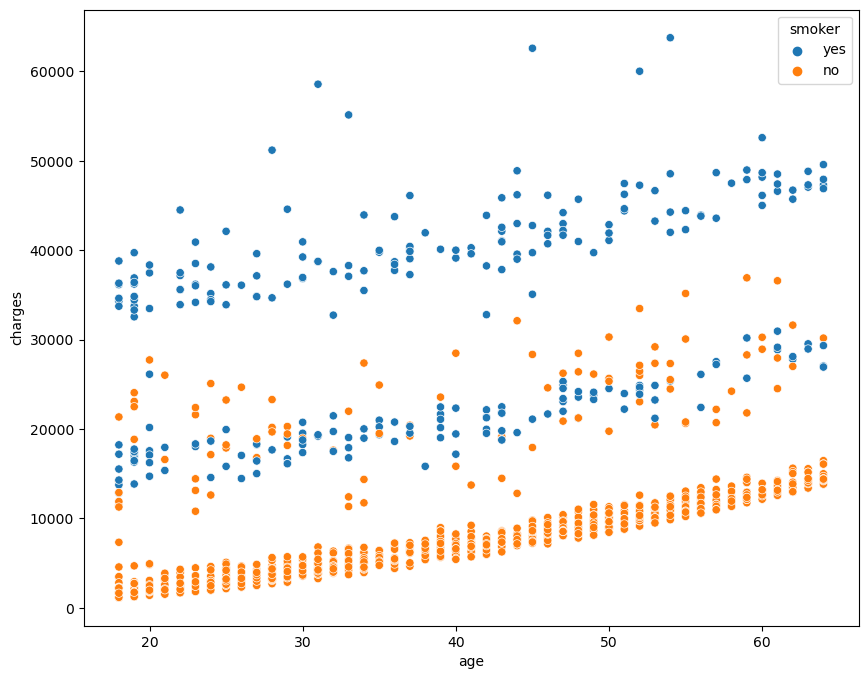

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', x_bins=100, y_bins=100)
plt.show()

In [16]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


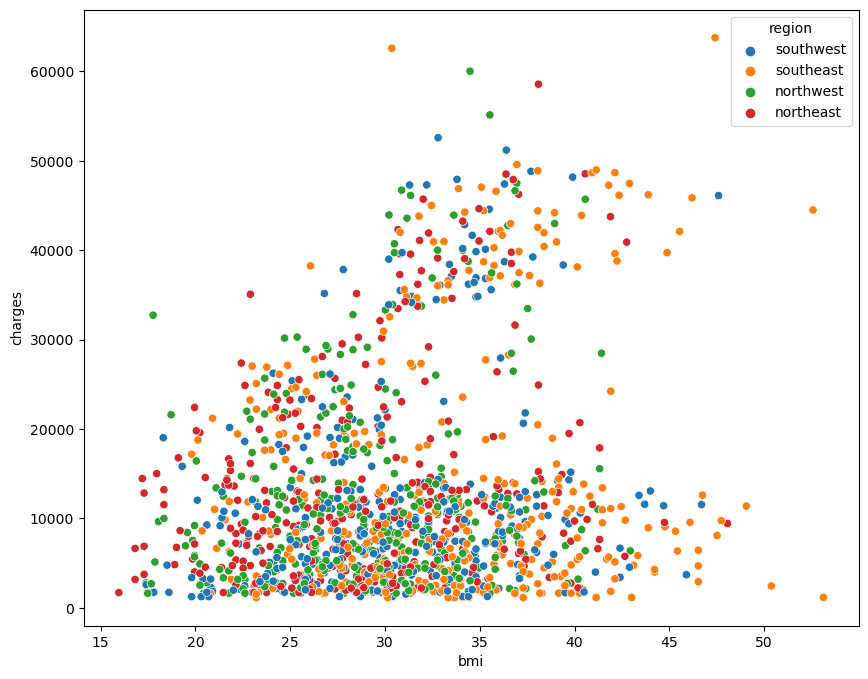

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='region', x_bins=100, y_bins=100)
plt.show()

In [18]:
#Missin values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Encoding Categorical Values and Explore Correlations

In [19]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [21]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [22]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
df_d = pd.get_dummies(df)

In [24]:
df_2 = df_d.drop(columns='charges')

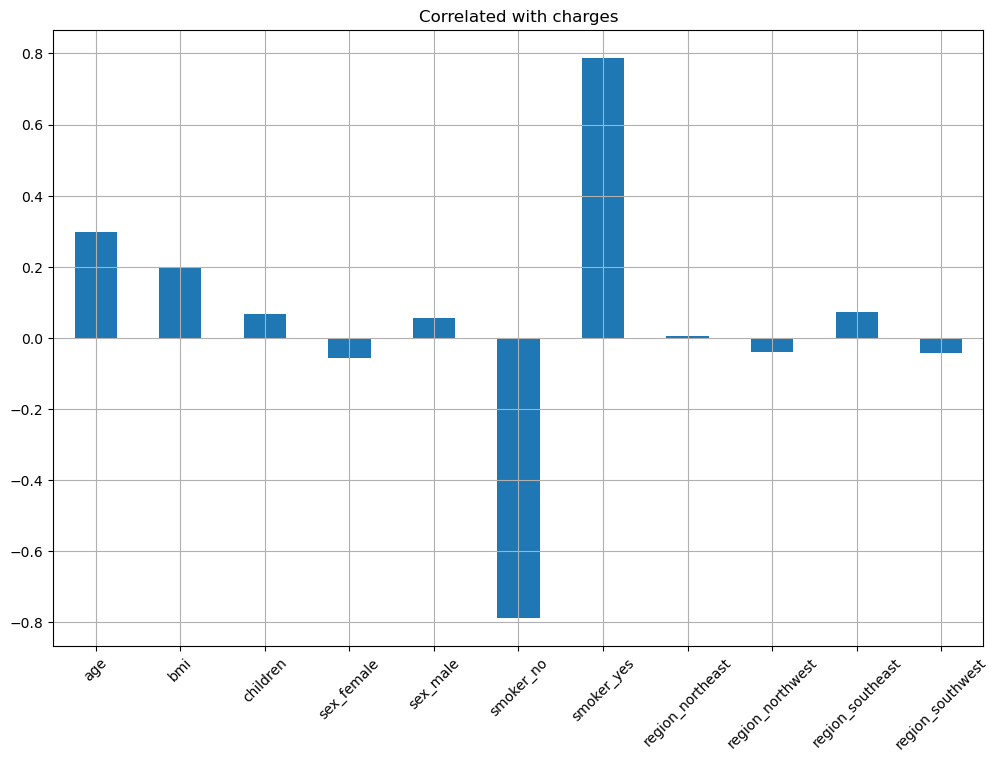

In [25]:
df_2.corrwith(df_d.charges).plot.bar(figsize=(12,8), title='Correlated with charges', grid=True, rot=45)
plt.show()

In [26]:
corr = df_d.corr()

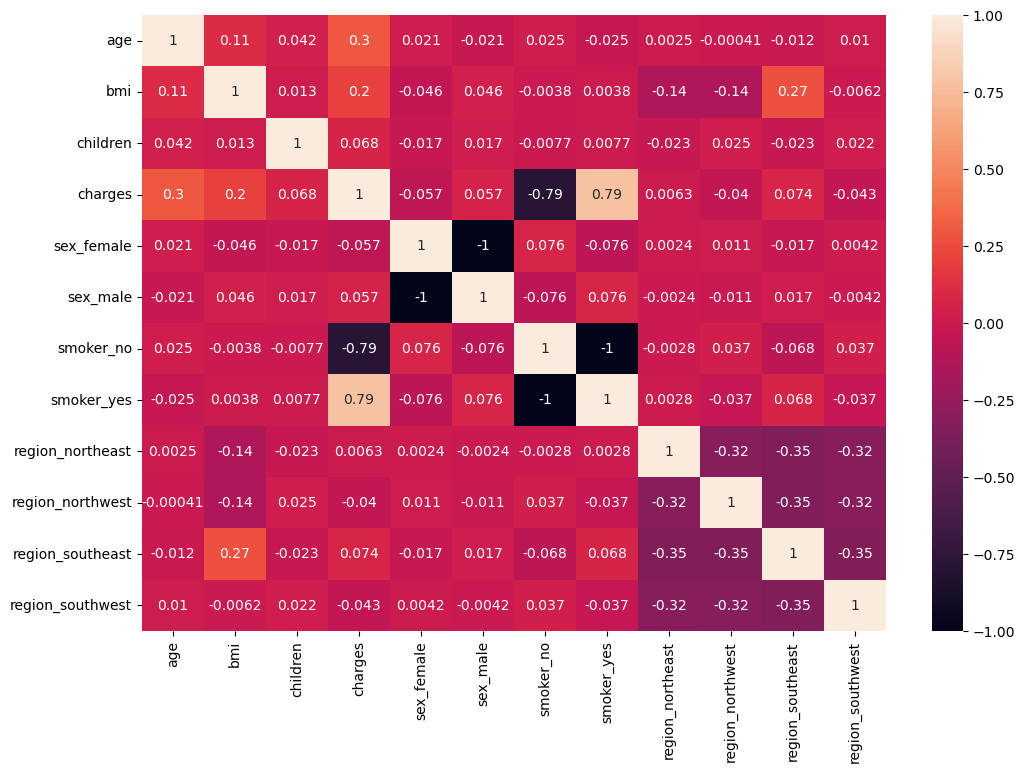

In [27]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data=corr, annot=True)
plt.show()

In [28]:
# Encoding Categorical Values with drop_first for modeling
df = pd.get_dummies(df, drop_first=True)

### Splitting the Dataset

In [29]:
# Matrix of features / independent variables
x = df.drop(columns='charges')

In [30]:
# Target variable
y = df.charges

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [33]:
x_train.shape

(1070, 8)

In [34]:
y_train.shape

(1070,)

In [35]:
x_test.shape

(268, 8)

In [36]:
y_test.shape

(268,)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 2. Building ML Models

### 2.1 Multiple Linear Regression 

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)
y_pred = regressor_lr.predict(x_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test, y_pred)

0.7999876970680433

## 2.2 Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)
y_pred = regressor_rf.predict(x_test)

In [45]:
r2_score(y_test, y_pred)

0.8825715524636172

## 2.2 XGBoost Regression

In [46]:
from xgboost import XGBRFRegressor

In [47]:
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)
y_pred = regressor_xgb.predict(x_test)

In [48]:
r2_score(y_test, y_pred)

0.8941632074709253

In [49]:
#Mean squered error: 0 = perfect fit
from sklearn.metrics import mean_squared_error

In [50]:
regressor_xgb_mse = mean_squared_error(y_test, y_pred)
regressor_xgb_rmse = np.sqrt(regressor_xgb_mse)
regressor_xgb_rmse

4103.876802176971

## 3. Hypermarameter tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV

### 3.1. XGBoost

In [52]:
parameters = {
    'lerning_rate': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'max_dpth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
    'min_child,weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
    }
parameters

{'lerning_rate': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
 'max_dpth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child,weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [53]:
random_cv = RandomizedSearchCV(estimator = regressor_xgb, param_distributions = parameters, n_iter = 5, 
                               scoring= 'neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [54]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:46:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                            num_parallel_tree=None,
               

In [55]:
random_cv.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0.4, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, lerning_rate=3.0, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_dpth=12,
               max_leaves=None, min_child,weight=5, min_child_weight=None,
               missing=nan, monotone_constraints=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', ...)

In [56]:
random_cv.best_params_

{'min_child,weight': 5,
 'max_dpth': 12,
 'lerning_rate': 3.0,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [57]:
regressor = random_cv.best_estimator_
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred)

[11:46:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.



0.7310209397299327

### 3.2. Random Forest Regressor

In [58]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['sqrt', 'log2', None]}

In [59]:
random_cv = RandomizedSearchCV(estimator = regressor_rf, param_distributions = parameters, n_iter = 10, 
                               scoring= 'neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [60]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [61]:
random_cv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features=None, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=500)

In [62]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [63]:
regressor = random_cv.best_estimator_
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred)

0.8892655273411194

In [64]:
final_regressor = random_cv.best_estimator_

In [65]:
comp = pd.DataFrame(data ={"True_V": y_test, "Pred": y_pred})
comp

,True_V,Pred
578,9724.53000,10470.691681
610,8547.69130,8549.350110
569,45702.02235,43792.574455
1034,12950.07120,13540.459979
198,9644.25250,9496.617239
...,...,...
1084,15019.76005,14513.137242
726,6664.68595,6757.124246
1132,20709.02034,11614.366492
725,40932.42950,38036.789683


In [66]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

578      746.161681
610        1.658810
569     1909.447895
1034     590.388779
198      147.635261
           ...     
1084     506.622808
726       92.438296
1132    9094.653848
725     2895.639817
963      441.720603
Length: 268, dtype: float64

In [67]:
mae = ae.mean()
mae

1866.3324458313832

### Feature Importance

In [68]:
final_regressor.feature_importances_

array([3.61914550e-01, 1.95836033e-01, 1.72885910e-02, 1.21980436e-03,
       4.23627500e-01, 6.77550807e-06, 7.59998552e-05, 3.07458345e-05])

In [69]:
feature_imp = pd.Series(data=final_regressor.feature_importances_, index=df.drop(columns='charges').columns)

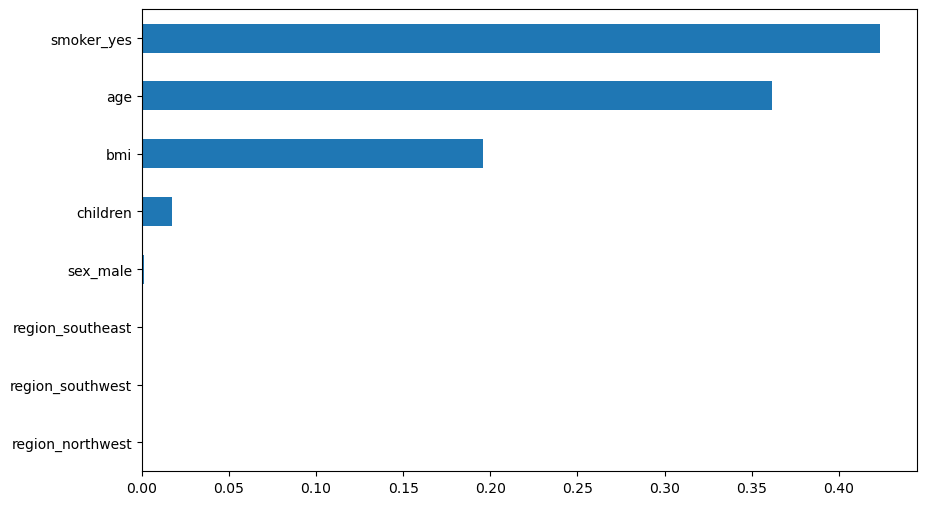

In [70]:
feature_imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.show()

In [71]:
imp_features = feature_imp.sort_values(ascending=False).head(5).index
imp_features

Index(['smoker_yes', 'age', 'bmi', 'children', 'sex_male'], dtype='object')

In [72]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [73]:
df_imp = df[imp_features]
df_imp.head()

,smoker_yes,age,bmi,children,sex_male
0,1,19,27.900,0,0
1,0,18,33.770,1,1
2,0,28,33.000,3,1
3,0,33,22.705,0,1
4,0,32,28.880,0,1


In [74]:
x_imp = df_imp
x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=0)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

final_regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred)

0.8896136279079673

In [75]:
comp = pd.DataFrame(data ={"True_V": y_test, "Pred": y_pred})
comp

,True_V,Pred
578,9724.53000,10489.717627
610,8547.69130,8592.462748
569,45702.02235,43610.684470
1034,12950.07120,13525.578622
198,9644.25250,9467.349713
...,...,...
1084,15019.76005,14543.688339
726,6664.68595,6817.501061
1132,20709.02034,11611.565597
725,40932.42950,38006.004804


In [76]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

578      765.187627
610       44.771448
569     2091.337880
1034     575.507422
198      176.902787
           ...     
1084     476.071711
726      152.815111
1132    9097.454743
725     2926.424696
963      484.582100
Length: 268, dtype: float64

In [77]:
mae = ae.mean()
mae

1867.2748689573143

### Predict Single Observation

In [78]:
single_obs = [[1,19,27.900,0,0]]

In [79]:
final_regressor.predict(sc.transform(single_obs))

/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([17906.04500195])